# Descriptive Statistics #

Sebutlah saya memiliki data. Saya tahu seperti apa secara umum tentang data ini.
Adakah cara untuk menjelaskan informasi umum dari data ini? Ada, yaitu dengan yang disebut dengan ___Descriptive Statistics___.

Berikut yang biasanya ada di dalam _Descriptive Statistics_:

* __Center__ (Untuk mengetahui nilai tengah dari data)
    * Mean
    * Median
    * Mode
    
    
* __Spread__ (Untuk mengetahui seberapa tersebar sih datanya)
    * Variance
    * Std. Deviation
    * Range
    * Percentiles
    
    
* __Form__
    * Skewness
    * Kurtosis
---
## (Arithmetic) Mean ##
Didefinisikan sebagai jumlah dari tiap-tiap pengamatan dibagi jumlah total pengamatan (bahasa Indonesia memang membingungkan):

$$\bar{x} = \frac{\sum_{i=1}^n x_i}{n}$$

dimana $x_1, x_2, \ldots , x_n$ adalah pengamatan kita.


In [132]:
import numpy as np
nilai = [80,90,95,84,85,88,80,83,80,87]
print ("Mean: {}".format())
print ("Mean using np: " + str(np.mean(nilai)))

nilai2 = nilai + [0]
print("Mean2: {}".format(np.mean(nilai2)))

Mean: 85.2
Mean using np: 85.2
Mean2: 77.45454545454545


## Median ##

Median dari suatu data adalah nilai yang berada ditengah-tengah data ketika data itu terurut. Jika banyaknya data merupakan bilangan ganjil $n$, maka mediannya adalah nilai pada posisi $(n+1)/2$. Sedangkan bila data merupakan bilangan genap $m$ maka mediannya merupaka rata-rata dari nilai pada posisi $n/2$ dan $(n+2)/2$.

In [134]:
print("Median: {}".format(np.median(nilai)))
print("Median2: {}".format(np.median(nilai2)))

Median: 84.5
Median2: 84.0


## Mode ##
Modus dari suatu data adalah nilai yang paling sering muncul pada data tersebut.

In [140]:
from scipy import stats
print("Mode: {}".format(stats.mode(nilai)[0][0]))
print("Mode2: {}".format(stats.mode(nilai2)[0][0]))

Mode: 80
Mode2: 80


## Range ##
Range didefinisikan sebagai selisih dari nilai maximum dan nilai minimum pada data.

In [141]:
print("Range: {}".format(np.ptp(nilai)))
print("Range2: {}".format(np.ptp(nilai2)))

Range: 15
Range2: 95


## Variance dan Standard Deviation ##
Variance didefinisikan sebagai nilai rata-rata dari kuadrat deviasi data di sekitar mean:
$$\sigma^2 = \frac{\sum_{i=1}^n(x_i - \bar{x})^2}{n}$$

Standard Deviasi didefinisikan sebagai akar dari variance:
$$\sigma = \sqrt{\sigma^2}$$
atau
$$\sigma = \sqrt{\frac{\sum_{i=1}^n(x_i - \bar{x})^2}{n}}$$

In [144]:
variance1 = np.var(nilai)
std1 = np.std(nilai)
variance2 = np.var(nilai2)
std2 = np.std(nilai2)

print("Variance & Std I: {}, {}".format(variance1, std1)) 
print("Variance & Std II: {}, {}".format(variance2, std2))

Variance & Std I: 21.759999999999998, 4.66476151587624
Variance & Std II: 619.7024793388429, 24.893824120428803


## Cara cepat Pakai Pandas ##

In [150]:
import pandas as pd

data1 = pd.DataFrame({'nilai':nilai})
data2 = pd.DataFrame({'nilai2':nilai2})
print(data1.describe())
print("-------------------------------")
print(data2.describe())

          nilai
count  10.00000
mean   85.20000
std     4.91709
min    80.00000
25%    80.75000
50%    84.50000
75%    87.75000
max    95.00000
-------------------------------
          nilai2
count  11.000000
mean   77.454545
std    26.108863
min     0.000000
25%    80.000000
50%    84.000000
75%    87.500000
max    95.000000


# Distribution #

Distribusi sebuah data adalah fungsi yang menunjukan semua nilai yang mungkin (_interval_) dan seberapa sering nilai itu muncul.

---
## Probability Mass Fucntion (PMF) ##
Sebuah fungsi yang memberikan nilai peluang dari sebuah variabel acak sama dengan suatu nilai.
Misalkan $X$ adalah sebuah variabel acak diskrit yang didefiniskan pada ruang sample $R$, maka fungsi PMF $f_X$ dari $X$ didefiniskan sebagai berikut:

$$ f_X(x)= P(X=x) = P({{s \in S : X(s) = x}})$$
---
## Cumulative distribution function ##
CDF dari sebuah nilai acak X adalah fungsi:

$$ F_X(x) = P(X \le x)$$

## Types of Distribution ##
* Discrete
    * Binomial
    * Poisson
* Continuous
    * Normal
    * Chi-Squared
    
---
## Discrete Dist (Binomial) ##
### PMF ###
$$ f(k;n,p) = P(X = k) = \binom{n}{k} \cdot p^k(1-p)^{n-k} $$
### CDF ###
$$ F(k;n,p) = P(X \le k) = \sum_{i=0}^k \binom{n}{i} \cdot p^i(1-p)^{n-i}$$

In [99]:
import random

N = 40

coin_toss =[0]*(N+1)

def coin_simulation(n):
    total = 0
    for i in range(n):
        head = random.randint(0,1)
        total += head
    return total

In [100]:
for i in range(5000):
    x = coin_simulation(N)
    coin_toss[x] += (1/5000)

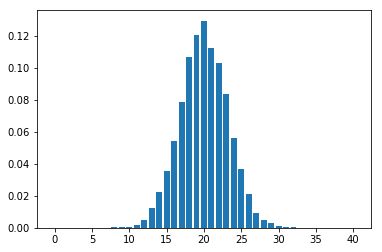

In [101]:
import matplotlib.pyplot as plt
plt.bar(range(N+1), coin_toss)
plt.show()

In [103]:
coin_toss_cdf = []
p = 0
for i in coin_toss:
    p += i
    coin_toss_cdf.append(p)

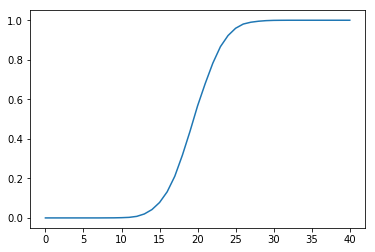

In [104]:
plt.plot(coin_toss_cdf)
plt.show()

In [78]:
import math
def binom_pmf(k,n,p):
    f = math.factorial
    nCk = f(n) / f(k)
    nCk /= f(n-k)
    return nCk*(p**k)*((1-p)**(n-k))

In [94]:
binom_dist = []
for i in range(41):
    binom_dist.append(binom_pmf(i,40,0.5))

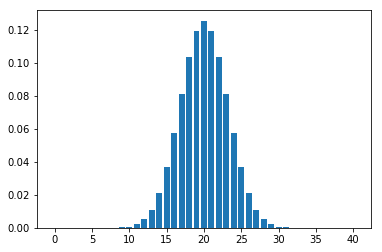

In [95]:
plt.bar(range(41), binom_dist)
plt.show()

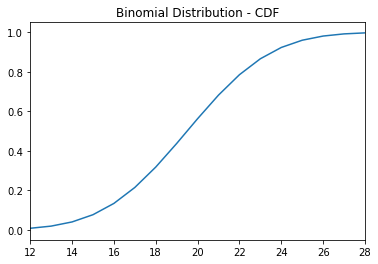

In [123]:
binom_cdf = []
p = 0
for i in binom_dist:
    p += i
    binom_cdf.append(p)
plt.plot(binom_cdf)
plt.title("Binomial Distribution - CDF")
plt.xlim([12,28])
plt.show()

## Continous Dist ##
### PMF ###


$$ f_{\mu,\sigma}(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}$$





### CDF ###


$$\Phi(x) = \frac{1}{2\pi}\int\limits_{-\infty}^x e^{\frac{-t^2}{2}}dt $$

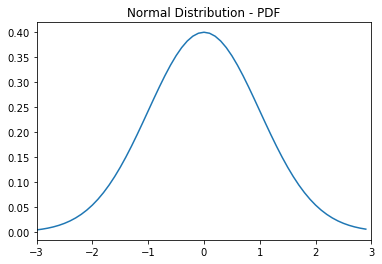

In [115]:
import numpy as np
import scipy.stats as sp
x = np.arange(-3,3,0.1)
norm_dist = sp.norm(0,1)
plt.plot(x,norm_dist.pdf(x))
plt.xlim([-3,3])
plt.title("Normal Distribution - PDF")
plt.show()

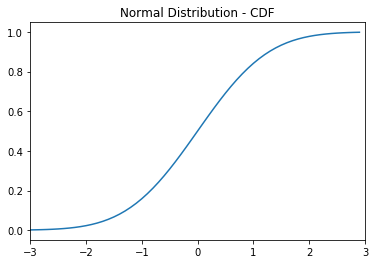

In [117]:
plt.plot(x,norm_dist.cdf(x))
plt.xlim([-3,3])
plt.title("Normal Distribution - CDF")
plt.show()

In [124]:
# We'll Back Latter

# T test #
The t test (also called Student’s T Test) compares two averages (means) and tells you if they are different from each other. The t test also tells you how significant the differences are; In other words it lets you know if those differences could have happened by chance.

## Two sample T Test ##
Kita ingin melihat apakah tinggi dari wanita dan pria berbeda secara umum. Kita mengguanak sample dari dua populasi yaitu tinggi pria dan tinggi wanita.

### Step-step ###
__1. Tentukan null hipotesis dan hipotesis aleternatif__
 
Umumnya, _Null Hypothesis_ dua populasi yang akan di test tidak memiliki perbedaan yang signifikan. Hipotesis alternatifnya adalah kebalikan dari _Null Hypothesis_

__2. Ambil data sample__

Kita ambil sample dari kedua populasi. Idealnya jumlah sample dari tiap populasi sama.

__3. Tentukan confidence interval dan derajat kebebasan__

confidence interval biasa disebut alpha ($\alpha$). nilai $\alpha$ biasanya $0.05$ ini berarti 95% keyakinan bahwa kesimpulannya valid. derajat kebebasan bisa dihitung dengan formula:
$$ df=n_x+n_y-2 $$

__4. Hitung t-statistics __
$$ t = \frac{M_x-M_y}{\sqrt{\frac{S_x^2}{n_x} + \frac{S_y^2}{n_y}}} $$


$$ S^2 = \frac{\sum (x-M)^2}{n-1} $$

dimana M adalah mean, $S^2$ adalah variance, n adalah jumlah sample

__5. Hitung p-value dari t distribution (pake tabel) __

Untung menghitung ini diperlukan nilai t-statistics yang sebelumnya dihitung dan derajat kebebasan. karena di Python, kita tidak perlu liat tabel tinggal panggil fungsi aja.

__6. Ambil kesimpulan berdasarkan p-value__

Bila p-value $\le \alpha$ makan bisa dikatakan hipotesis null ditolak


In [173]:
## MAAF TAPI INI BUKAN PAKE TINGGI BADAN ORANG ##
N = 10
a = np.random.randn(N) + 0.7
b = np.random.randn(N)


var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

s = np.sqrt((var_a + var_b)/2)
s



## hitung t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))



#Derajat kebebasan
df = 2*N - 2

#hitung p-value
p = 1 - stats.t.cdf(t,df=df)


print("t = " + str(t))
print("p = " + str(2*p))

t = 1.48569477582
p = 0.154664310473


In [175]:
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

t = 1.48569477582
p = 0.154664310473
